In [1]:
import pandas as pd

# Load the datasets
reddit_path = "Reddit_Data.csv"
twitter_path = "Twitter_Data.csv"

reddit_df = pd.read_csv(reddit_path)
twitter_df = pd.read_csv(twitter_path)

# Display basic information about the datasets
reddit_info = reddit_df.info()
twitter_info = twitter_df.info()

# Show the first few rows of each dataset
reddit_head = reddit_df.head()
twitter_head = twitter_df.head()

# Check for missing values
reddit_missing = reddit_df.isnull().sum()
twitter_missing = twitter_df.isnull().sum()

# Check for duplicate rows
reddit_duplicates = reddit_df.duplicated().sum()
twitter_duplicates = twitter_df.duplicated().sum()

# Check sentiment distribution
reddit_sentiment_dist = reddit_df.iloc[:, -1].value_counts()
twitter_sentiment_dist = twitter_df.iloc[:, -1].value_counts()

# Display the insights
reddit_info, twitter_info, reddit_head, twitter_head, reddit_missing, twitter_missing, reddit_duplicates, twitter_duplicates, reddit_sentiment_dist, twitter_sentiment_dist

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


(None,
 None,
                                        clean_comment  category
 0   family mormon have never tried explain them t...         1
 1  buddhism has very much lot compatible with chr...         1
 2  seriously don say thing first all they won get...        -1
 3  what you have learned yours and only yours wha...         0
 4  for your own benefit you may want read living ...         1,
                                           clean_text  category
 0  when modi promised “minimum government maximum...      -1.0
 1  talk all the nonsense and continue all the dra...       0.0
 2  what did just say vote for modi  welcome bjp t...       1.0
 3  asking his supporters prefix chowkidar their n...       1.0
 4  answer who among these the most powerful world...       1.0,
 clean_comment    100
 category           0
 dtype: int64,
 clean_text    4
 category      7
 dtype: int64,
 449,
 1,
 category
  1    15830
  0    13142
 -1     8277
 Name: count, dtype: int64,
 category
  1.0    72

In [2]:
# Drop missing values
reddit_df_cleaned = reddit_df.dropna()
twitter_df_cleaned = twitter_df.dropna()

# Drop duplicate rows
reddit_df_cleaned = reddit_df_cleaned.drop_duplicates()
twitter_df_cleaned = twitter_df_cleaned.drop_duplicates()

# Convert category to integer (for Twitter dataset)
twitter_df_cleaned['category'] = twitter_df_cleaned['category'].astype(int)

# Convert text column to string (ensure it's consistent)
reddit_df_cleaned['clean_comment'] = reddit_df_cleaned['clean_comment'].astype(str)
twitter_df_cleaned['clean_text'] = twitter_df_cleaned['clean_text'].astype(str)

# Verify cleaning results
reddit_clean_info = reddit_df_cleaned.info()
twitter_clean_info = twitter_df_cleaned.info()

# Check updated sentiment distribution
reddit_sentiment_dist_clean = reddit_df_cleaned['category'].value_counts()
twitter_sentiment_dist_clean = twitter_df_cleaned['category'].value_counts()

reddit_clean_info, twitter_clean_info, reddit_sentiment_dist_clean, twitter_sentiment_dist_clean

<class 'pandas.core.frame.DataFrame'>
Index: 36799 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  36799 non-null  object
 1   category       36799 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 862.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  162969 non-null  object
 1   category    162969 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 3.1+ MB


(None,
 None,
 category
  1    15771
  0    12778
 -1     8250
 Name: count, dtype: int64,
 category
  1    72249
  0    55211
 -1    35509
 Name: count, dtype: int64)

In [3]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function for text cleaning and preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize words
    words = text.split()
    
    # Remove stopwords and apply lemmatization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return " ".join(words)

# Apply preprocessing to both datasets
reddit_df_cleaned['clean_comment'] = reddit_df_cleaned['clean_comment'].apply(preprocess_text)
twitter_df_cleaned['clean_text'] = twitter_df_cleaned['clean_text'].apply(preprocess_text)

# Save cleaned datasets (optional)
reddit_df_cleaned.to_csv("Reddit_Cleaned.csv", index=False)
twitter_df_cleaned.to_csv("Twitter_Cleaned.csv", index=False)

# Display sample cleaned text
print(reddit_df_cleaned.head())
print(twitter_df_cleaned.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                       clean_comment  category
0  family mormon never tried explain still stare ...         1
1  buddhism much lot compatible christianity espe...         1
2  seriously say thing first get complex explain ...        -1
3  learned want teach different focus goal wrappi...         0
4  benefit may want read living buddha living chr...         1
                                          clean_text  category
0  modi promised minimum government maximum gover...        -1
1             talk nonsense continue drama vote modi         0
2  say vote modi welcome bjp told rahul main camp...         1
3  asking supporter prefix chowkidar name modi gr...         1
4  answer among powerful world leader today trump...         1


In [7]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


📊 Reddit Sentiment Distribution


C:\Users\Shik\AppData\Local\Temp\ipykernel_1012\2547368769.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['category'], palette="viridis")


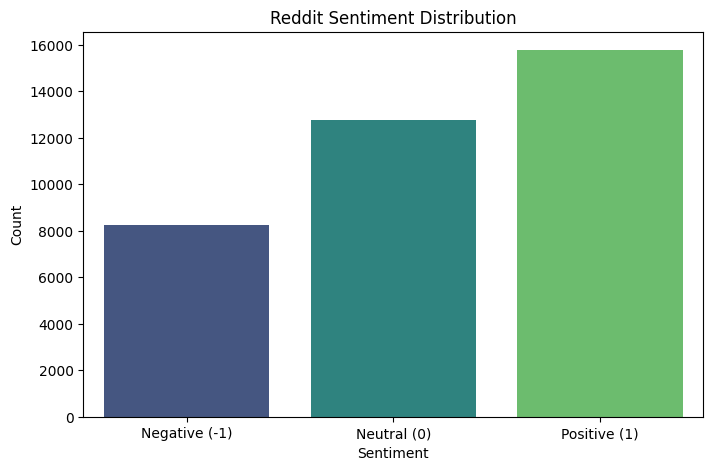

☁️ Word Cloud - Positive Sentiment (Reddit)


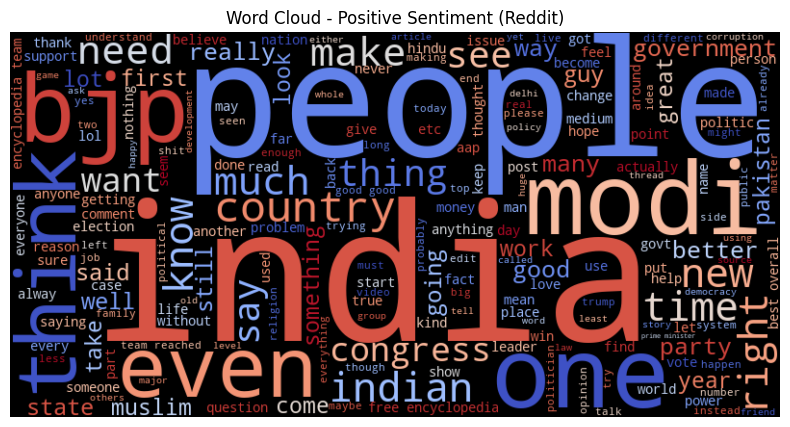

☁️ Word Cloud - Negative Sentiment (Reddit)


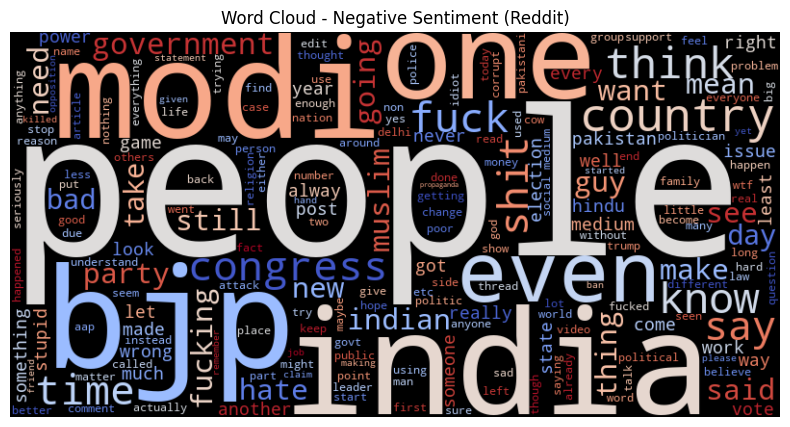

📌 Most Common Words - Reddit


C:\Users\Shik\AppData\Local\Temp\ipykernel_1012\2547368769.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="coolwarm")


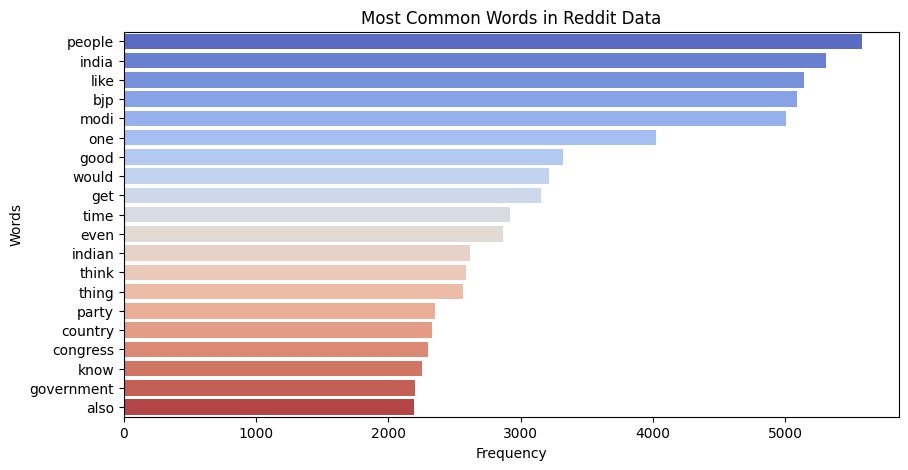

📊 Bigrams - Reddit


C:\Users\Shik\AppData\Local\Temp\ipykernel_1012\2547368769.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=ngram_strings, palette="magma")


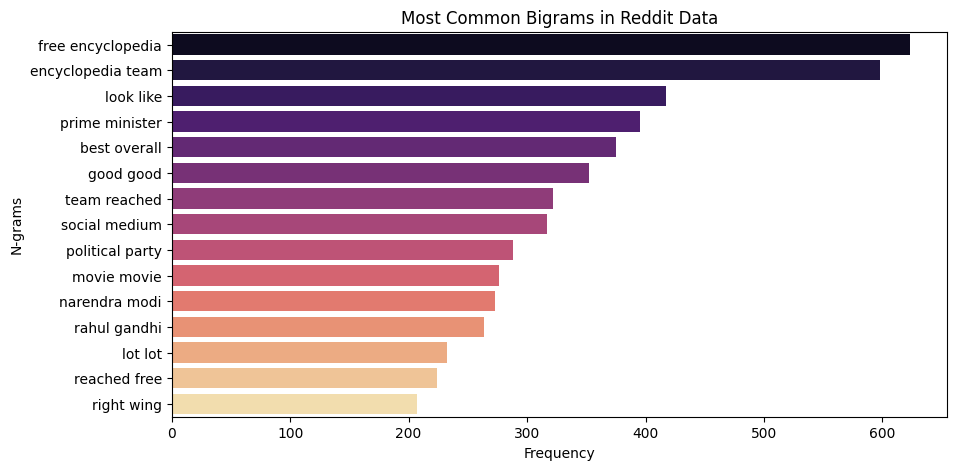

📊 Trigrams - Reddit


C:\Users\Shik\AppData\Local\Temp\ipykernel_1012\2547368769.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=ngram_strings, palette="magma")


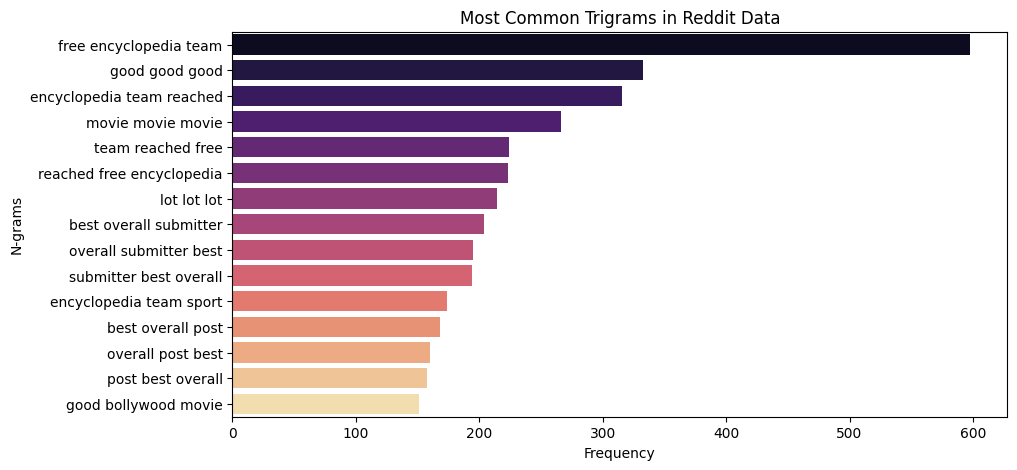

📊 Twitter Sentiment Distribution


C:\Users\Shik\AppData\Local\Temp\ipykernel_1012\2547368769.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['category'], palette="viridis")


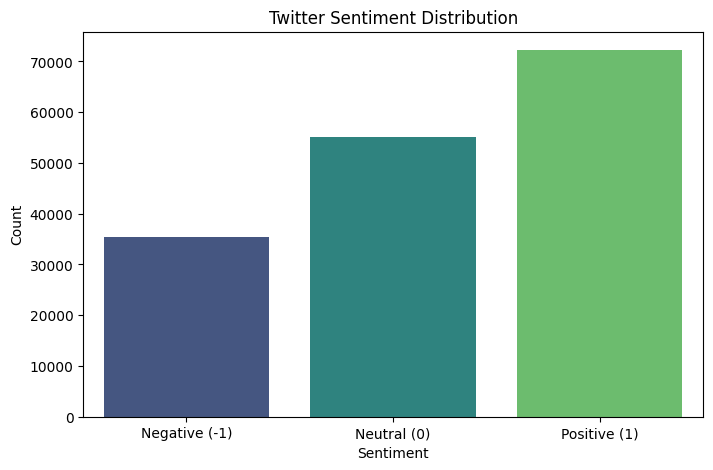

☁️ Word Cloud - Positive Sentiment (Twitter)


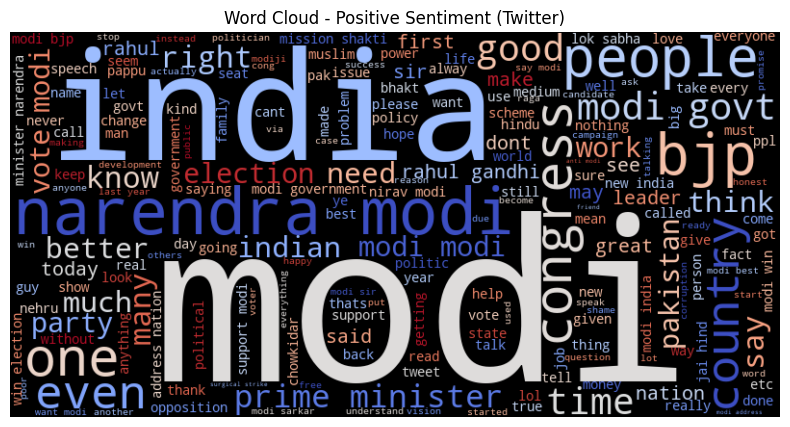

☁️ Word Cloud - Negative Sentiment (Twitter)


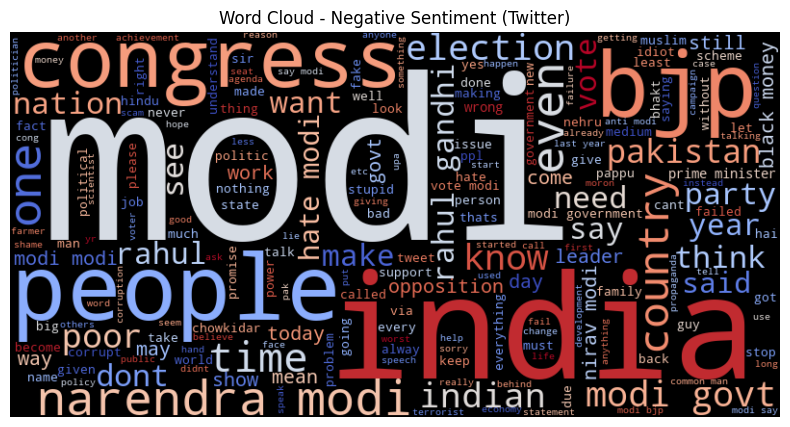

📌 Most Common Words - Twitter


C:\Users\Shik\AppData\Local\Temp\ipykernel_1012\2547368769.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="coolwarm")


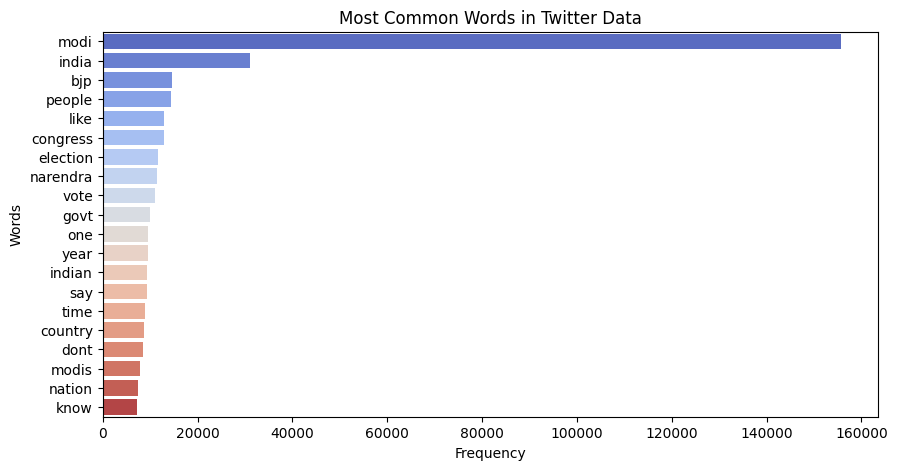

📊 Bigrams - Twitter


C:\Users\Shik\AppData\Local\Temp\ipykernel_1012\2547368769.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=ngram_strings, palette="magma")


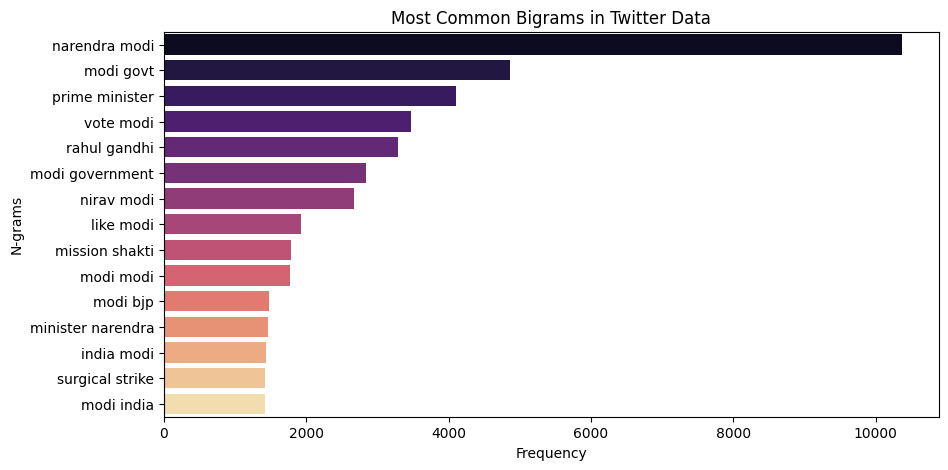

📊 Trigrams - Twitter


C:\Users\Shik\AppData\Local\Temp\ipykernel_1012\2547368769.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=ngram_strings, palette="magma")


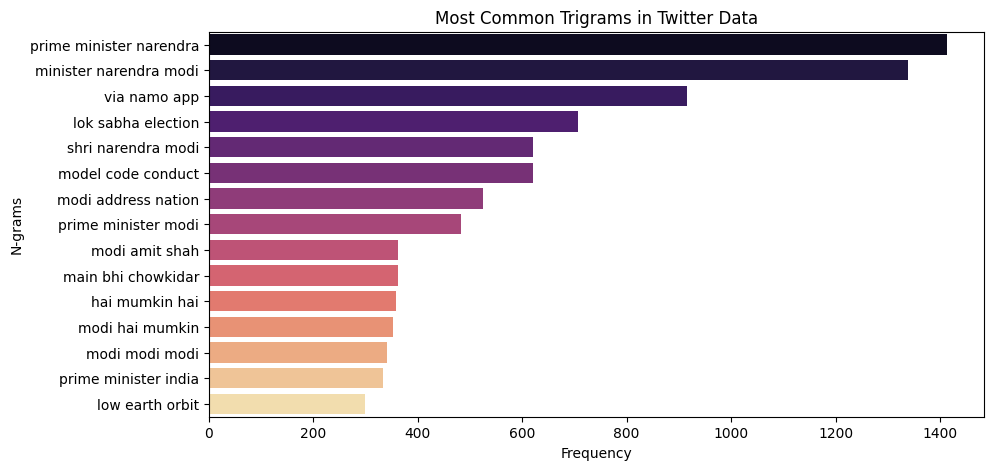

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
import itertools
from nltk.util import ngrams

# Function to plot sentiment distribution
def plot_sentiment_distribution(df, title):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df['category'], palette="viridis")
    plt.title(title)
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.xticks(ticks=[0, 1, 2], labels=["Negative (-1)", "Neutral (0)", "Positive (1)"])
    plt.show()

# Function to generate a word cloud
def generate_wordcloud(text_data, title):
    text = " ".join(text_data)
    wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='coolwarm').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

# Function to find most common words
def plot_most_common_words(text_data, title, num_words=20):
    all_words = list(itertools.chain(*[text.split() for text in text_data]))
    common_words = Counter(all_words).most_common(num_words)
    
    words, counts = zip(*common_words)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(counts), y=list(words), palette="coolwarm")
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()

# Function to analyze n-grams (bigrams & trigrams)
def plot_ngrams(text_data, title, n=2, num_words=15):
    all_ngrams = list(itertools.chain(*[list(ngrams(text.split(), n)) for text in text_data]))
    common_ngrams = Counter(all_ngrams).most_common(num_words)
    
    ngram_texts, counts = zip(*common_ngrams)
    ngram_strings = [" ".join(ngram) for ngram in ngram_texts]
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(counts), y=ngram_strings, palette="magma")
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("N-grams")
    plt.show()

# ---- APPLY TO REDDIT DATA ----
print("📊 Reddit Sentiment Distribution")
plot_sentiment_distribution(reddit_df_cleaned, "Reddit Sentiment Distribution")

print("☁️ Word Cloud - Positive Sentiment (Reddit)")
generate_wordcloud(reddit_df_cleaned[reddit_df_cleaned['category'] == 1]['clean_comment'], "Word Cloud - Positive Sentiment (Reddit)")

print("☁️ Word Cloud - Negative Sentiment (Reddit)")
generate_wordcloud(reddit_df_cleaned[reddit_df_cleaned['category'] == -1]['clean_comment'], "Word Cloud - Negative Sentiment (Reddit)")

print("📌 Most Common Words - Reddit")
plot_most_common_words(reddit_df_cleaned['clean_comment'], "Most Common Words in Reddit Data")

print("📊 Bigrams - Reddit")
plot_ngrams(reddit_df_cleaned['clean_comment'], "Most Common Bigrams in Reddit Data", n=2)

print("📊 Trigrams - Reddit")
plot_ngrams(reddit_df_cleaned['clean_comment'], "Most Common Trigrams in Reddit Data", n=3)

# ---- APPLY TO TWITTER DATA ----
print("📊 Twitter Sentiment Distribution")
plot_sentiment_distribution(twitter_df_cleaned, "Twitter Sentiment Distribution")

print("☁️ Word Cloud - Positive Sentiment (Twitter)")
generate_wordcloud(twitter_df_cleaned[twitter_df_cleaned['category'] == 1]['clean_text'], "Word Cloud - Positive Sentiment (Twitter)")

print("☁️ Word Cloud - Negative Sentiment (Twitter)")
generate_wordcloud(twitter_df_cleaned[twitter_df_cleaned['category'] == -1]['clean_text'], "Word Cloud - Negative Sentiment (Twitter)")

print("📌 Most Common Words - Twitter")
plot_most_common_words(twitter_df_cleaned['clean_text'], "Most Common Words in Twitter Data")

print("📊 Bigrams - Twitter")
plot_ngrams(twitter_df_cleaned['clean_text'], "Most Common Bigrams in Twitter Data", n=2)

print("📊 Trigrams - Twitter")
plot_ngrams(twitter_df_cleaned['clean_text'], "Most Common Trigrams in Twitter Data", n=3)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))

# Prepare Reddit Data
X_reddit = tfidf_vectorizer.fit_transform(reddit_df_cleaned['clean_comment'])
y_reddit = reddit_df_cleaned['category']

# Prepare Twitter Data
X_twitter = tfidf_vectorizer.fit_transform(twitter_df_cleaned['clean_text'])
y_twitter = twitter_df_cleaned['category']

# Split Reddit Data
X_train_reddit, X_test_reddit, y_train_reddit, y_test_reddit = train_test_split(X_reddit, y_reddit, test_size=0.2, random_state=42)

# Split Twitter Data
X_train_twitter, X_test_twitter, y_train_twitter, y_test_twitter = train_test_split(X_twitter, y_twitter, test_size=0.2, random_state=42)

# Print shapes of the datasets
print(f"Reddit Train Shape: {X_train_reddit.shape}, Reddit Test Shape: {X_test_reddit.shape}")
print(f"Twitter Train Shape: {X_train_twitter.shape}, Twitter Test Shape: {X_test_twitter.shape}")

Reddit Train Shape: (29439, 10000), Reddit Test Shape: (7360, 10000)
Twitter Train Shape: (130375, 10000), Twitter Test Shape: (32594, 10000)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Function to train & evaluate models
def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name):
    # Train model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Print evaluation metrics
    print(f"🔹 Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}\n")
    
    return model

# Initialize models
log_reg = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier(n_estimators=100)
svm_model = SVC(kernel='linear')

# Train and evaluate models on Reddit dataset
print("📌 Training on Reddit Data")
train_and_evaluate(log_reg, X_train_reddit, y_train_reddit, X_test_reddit, y_test_reddit, "Logistic Regression")
train_and_evaluate(random_forest, X_train_reddit, y_train_reddit, X_test_reddit, y_test_reddit, "Random Forest")
train_and_evaluate(svm_model, X_train_reddit, y_train_reddit, X_test_reddit, y_test_reddit, "SVM")

# Train and evaluate models on Twitter dataset
print("\n📌 Training on Twitter Data")
train_and_evaluate(log_reg, X_train_twitter, y_train_twitter, X_test_twitter, y_test_twitter, "Logistic Regression")
train_and_evaluate(random_forest, X_train_twitter, y_train_twitter, X_test_twitter, y_test_twitter, "Random Forest")
train_and_evaluate(svm_model, X_train_twitter, y_train_twitter, X_test_twitter, y_test_twitter, "SVM")

📌 Training on Reddit Data
🔹 Model: Logistic Regression
Accuracy: 0.8311
              precision    recall  f1-score   support

          -1       0.85      0.61      0.71      1651
           0       0.80      0.94      0.86      2509
           1       0.85      0.85      0.85      3200

    accuracy                           0.83      7360
   macro avg       0.84      0.80      0.81      7360
weighted avg       0.83      0.83      0.83      7360

Cross-Validation Accuracy: 0.8245 ± 0.0042

🔹 Model: Random Forest
Accuracy: 0.8007
              precision    recall  f1-score   support

          -1       0.85      0.44      0.58      1651
           0       0.84      0.92      0.88      2509
           1       0.76      0.89      0.82      3200

    accuracy                           0.80      7360
   macro avg       0.82      0.75      0.76      7360
weighted avg       0.81      0.80      0.79      7360

Cross-Validation Accuracy: 0.8015 ± 0.0036

🔹 Model: SVM
Accuracy: 0.8492
        

SVC(kernel='linear')

In [16]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

# ✅ Step 1: Load the dataset
reddit_data_path = "Reddit_Data.csv"  # Update the path if needed
twitter_data_path = "Twitter_Data.csv"

# Read datasets
reddit_df = pd.read_csv(reddit_data_path)
twitter_df = pd.read_csv(twitter_data_path)

# ✅ Step 2: Check and clean data (Handle missing values)
reddit_df = reddit_df.dropna(subset=['clean_comment'])
twitter_df = twitter_df.dropna(subset=['clean_text'])

# Extract text and labels
X_reddit, y_reddit = reddit_df['clean_comment'], reddit_df['category'].astype(int)
# Remove missing values in the 'category' column
twitter_df = twitter_df.dropna(subset=['category'])

# Convert sentiment column to integer, handling errors safely
twitter_df['category'] = pd.to_numeric(twitter_df['category'], errors='coerce')

# Drop remaining NaNs after conversion
twitter_df = twitter_df.dropna(subset=['category'])

# Convert to integers
X_twitter, y_twitter = twitter_df['clean_text'], twitter_df['category'].astype(int)


# ✅ Step 3: Convert text data to numerical format using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limiting features for efficiency
X_reddit_tfidf = vectorizer.fit_transform(X_reddit)
X_twitter_tfidf = vectorizer.transform(X_twitter)

# ✅ Step 4: Define parameter grids for tuning
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

logreg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# ✅ Step 5: Perform Grid Search for Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg_grid_search = GridSearchCV(logreg, logreg_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
logreg_grid_search.fit(X_reddit_tfidf, y_reddit)

# ✅ Step 6: Perform Grid Search for SVM
svm = SVC()
svm_grid_search = GridSearchCV(svm, svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid_search.fit(X_reddit_tfidf, y_reddit)

# ✅ Step 7: Retrieve best parameters and accuracy
best_logreg_params = logreg_grid_search.best_params_
best_logreg_score = logreg_grid_search.best_score_

best_svm_params = svm_grid_search.best_params_
best_svm_score = svm_grid_search.best_score_

print("✅ Optimization Complete!")
print(f"🔹 Best Logistic Regression Params: {best_logreg_params}, Accuracy: {best_logreg_score:.4f}")
print(f"🔹 Best SVM Params: {best_svm_params}, Accuracy: {best_svm_score:.4f}")

✅ Optimization Complete!
🔹 Best Logistic Regression Params: {'C': 10, 'solver': 'liblinear'}, Accuracy: 0.8984
🔹 Best SVM Params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}, Accuracy: 0.8951


In [17]:
pip install streamlit scikit-learn pandas joblib

Note: you may need to restart the kernel to use updated packages.


In [18]:
import joblib

# Save the models
joblib.dump(log_reg, "logistic_regression.pkl")
joblib.dump(random_forest, "random_forest.pkl")
joblib.dump(svm_model, "svm_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("✅ Models saved successfully!")

✅ Models saved successfully!
